<a href="https://colab.research.google.com/github/watitap/Machine-Learning-I/blob/main/Competency4_Task1_WatitaPojanakanokporn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MNIST

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. For this project, the dataset is splitted in a training set of the first 50,000 examples, then a validation set of 10,000 examples, and a test set of 10,000 examples

Reference: https://www.openml.org/search?type=data&status=active&id=554

### Import functions and MNIST dataset

In [80]:
import os
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.datasets import fetch_openml

### Load data via OpenML

In [81]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

### Prepare data

In [82]:
X, y = mnist["data"], mnist["target"]
X.shape
y.shape
print("Shape of X:", X.shape,"\nShape of y:", y.shape)

Shape of X: (70000, 784) 
Shape of y: (70000,)


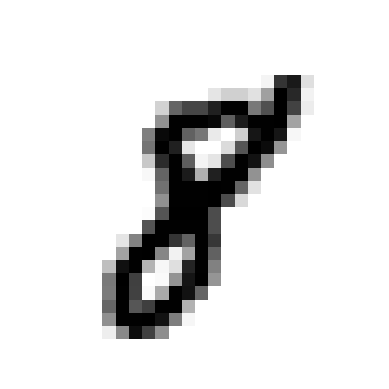

In [83]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X.to_numpy()[17] # getting data from index 17 which represents number 8
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [84]:
# Define target on index 17
y[17]

'8'

In [85]:
import numpy as np
y = y.astype(np.uint8)

In [86]:
# Split dataset into training set and validation set and test set
import numpy as np
from sklearn.model_selection import train_test_split

# Setting 50000 for Training set and the rest is for the remaining set
X_train, X_test, y_train, y_test = X[:50000], X[50000:], y[:50000], y[50000:]
# Splitting the remaining set into validation set and test set
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)

In [87]:
# Confirm that dataset is splitted into 3 sets
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset)))

50000
10000
10000


In [88]:
print("Total of images is",len(y), "\n\n"
      "Training set is",len(y_train), "\n"
      "Remaining set is",len(y_val),"which is splitted into test set and validation set\n\n"
      "Test set is",len(y_test), "and Validation set is",len(y_val))

Total of images is 70000 

Training set is 50000 
Remaining set is 10000 which is splitted into test set and validation set

Test set is 10000 and Validation set is 10000


## Training a Binary Classifier

In [89]:
# Set target variables for training set, test set, and validation set
y_train_8 = (y_train == 8)  # True for all 8s, False for all other digits on training set
y_val_8 = (y_val == 8) # True for all 8s, False for all other digits on validation set
y_test_8 = (y_test == 8) # True for all 8s, False for all other digits on test set

In [90]:
# Predict result on training set using Stochastic Gradient Descent (SGD) classifier
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_8)
sgd_clf.predict([some_digit])

array([ True])

In [91]:
# Predict result on validation set using Stochastic Gradient Descent (SGD) classifier
sgd_clf.fit(X_val, y_val_8)
sgd_clf.predict([some_digit])

array([ True])

In [92]:
# Predict result on test set using Stochastic Gradient Descent (SGD) classifier
sgd_clf.fit(X_val, y_val_8)
sgd_clf.predict([some_digit])

array([ True])

In [93]:
# Evaluate accuracy using k-fold cross validation on trainning set
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_8, cv=5, scoring="accuracy")

array([0.9416, 0.9293, 0.9355, 0.9025, 0.9437])

In [94]:
# Evaluate accuracy using k-fold cross validation on validation set
cross_val_score(sgd_clf, X_val, y_val_8, cv=5, scoring="accuracy")

array([0.906 , 0.932 , 0.93  , 0.9375, 0.9215])

In [95]:
# Evaluate accuracy using k-fold cross validation on test set
cross_val_score(sgd_clf, X_test, y_test_8, cv=5, scoring="accuracy")

array([0.9125, 0.9275, 0.93  , 0.931 , 0.926 ])

In [96]:
# Re-evaulate to check the accuracy of images that are not 8
from sklearn.base import BaseEstimator

class Never8Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_8_clf = Never8Classifier()
cross_val_score(never_8_clf, X_train, y_train_8, cv=5, scoring="accuracy") # accuracy on not 8 on training set

array([0.9056, 0.9022, 0.9047, 0.9015, 0.9018])

In [97]:
cross_val_score(never_8_clf, X_val, y_val_8, cv=5, scoring="accuracy") # accuracy on not 8 on validation set

array([0.9035, 0.896 , 0.898 , 0.8925, 0.9085])

In [98]:
cross_val_score(never_8_clf, X_test, y_test_8, cv=5, scoring="accuracy") # accuracy on not 8 on test set

array([0.9055, 0.8975, 0.908 , 0.8905, 0.9085])

In [99]:
# Predict training set using cross validation
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_8, cv=5)
y_train_pred


array([False, False, False, ...,  True,  True, False])

In [100]:
y_val_pred = cross_val_predict(sgd_clf, X_val, y_val_8, cv=5)
y_val_pred

array([ True, False, False, ..., False, False, False])

In [101]:
y_test_pred = cross_val_predict(sgd_clf, X_test, y_test_8, cv=5)
y_test_pred

array([False, False, False, ..., False,  True, False])

In [102]:
# Define performance on training set using confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_8, y_train_pred)

array([[43778,  1380],
       [ 2094,  2748]])

In [103]:
confusion_matrix(y_val_8, y_val_pred)

array([[8636,  361],
       [ 385,  618]])

In [104]:
confusion_matrix(y_test_8, y_test_pred)

array([[8589,  431],
       [ 315,  665]])

In [105]:
y_train_perfect_predictions = y_train_8  # pretend we reached perfection
confusion_matrix(y_train_8, y_train_perfect_predictions)

array([[45158,     0],
       [    0,  4842]])

In [106]:
# Define presicion score on training set (True Positive/ True Positive + False Positive )
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_8, y_train_pred) # == 2748 / (2748 +  1380)

0.6656976744186046

In [107]:
# Define presicion score on validation set
precision_score(y_val_8, y_val_pred) # == 743 / (743 +777)

0.6312563840653729

In [108]:
# Define presicion score on test set
precision_score(y_test_8, y_test_pred) # == 765 / (765 +960)

0.6067518248175182

In [109]:
# Define Recall score on training set (True Positive/ True Positive + False Negative )
recall_score(y_train_8, y_train_pred) 

0.5675340768277571

In [110]:
# Define Recall score on validation set (True Positive/ True Positive + False Negative )
recall_score(y_val_8, y_val_pred) 

0.6161515453639083

In [111]:
# Define Recall score on test set 
recall_score(y_test_8, y_test_pred) 

0.6785714285714286

In [112]:
# Define f1 score on training set

from sklearn.metrics import f1_score

f1_score(y_train_8, y_train_pred) 

0.6127090301003345

In [113]:
# Define f1 score on validation set
f1_score(y_val_8, y_val_pred) 

0.6236125126135217

In [114]:
# Define f1 score on test set
f1_score(y_test_8, y_test_pred) 

0.6406551059730251

In [115]:
# Predict using cross validation
y_scores = cross_val_predict(sgd_clf, X_train, y_train_8, cv=5,
                             method="decision_function")
y_scores

array([-16949.00456757, -10340.29156281, -20734.75782378, ...,
         2047.38034549,   2913.49008614,  -2877.76683446])

#### Plotting 

In [116]:
# Assume some threshold
threshold = 1000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False, False, False, ...,  True,  True, False])

In [117]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_8, y_scores)

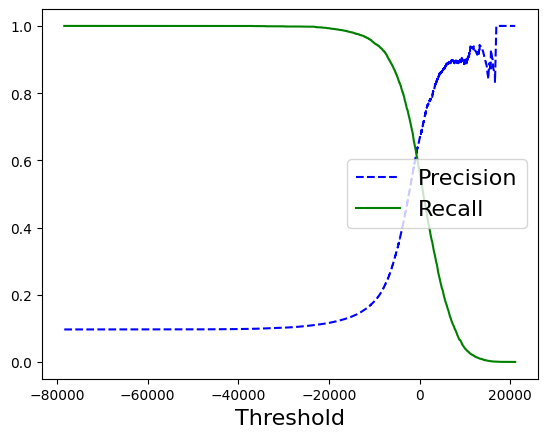

In [118]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16) 
    [...] # highlight the threshold and add the legend, axis label, and grid

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [119]:
# Define valus of thershold that has precison over 90%
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
print("Threshold at",threshold_90_precision, "will have a precision equal or greater than 90%")

Threshold at 7094.544452957077 will have a precision equal or greater than 90%


In [120]:
y_train_pred_90 = (y_scores >= threshold_90_precision)
y_train_pred_90

array([False, False, False, ..., False, False, False])

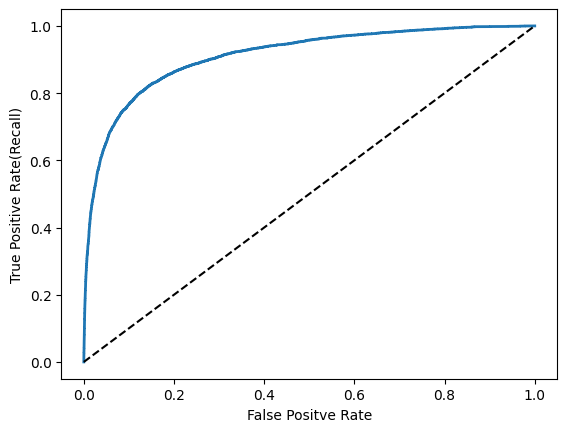

In [121]:
# Plot the False Positive Rat(FPR) against the True Positive Rate(TPR)
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_8, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
    [...] # Add axis labels and grid

plot_roc_curve(fpr, tpr)
plt.xlabel("False Positve Rate")
plt.ylabel("True Positive Rate(Recall)")
plt.show()

In [122]:
# Define score of Area Under the Receiver Operating Characteristic Curve (ROC AUC)
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_8, y_scores)

0.9110286853855037

## Train dataset using Random Forest Classifier

In [123]:
# Train dataset using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42, max_depth=4)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_8, cv=5,
                                    method="predict_proba")
forest_clf.fit(X_train, y_train_8) 
forest_clf.predict([some_digit])

array([False])

In [124]:
forest_clf.predict(X_val)

array([False, False, False, ..., False, False, False])

In [125]:
forest_clf.predict(X_test)

array([False, False, False, ..., False, False, False])

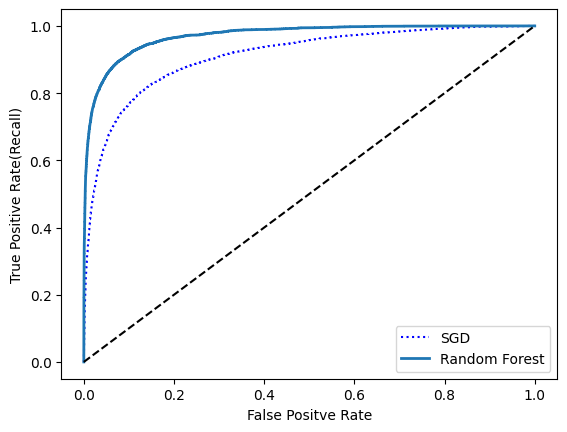

In [126]:
# Define score for positive class’s probability and plot ROC curve to compare SGD and Random Forest algorithms
y_scores_forest = y_probas_forest[:, 1]   # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_8, y_scores_forest)

plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.xlabel("False Positve Rate")

plt.ylabel("True Positive Rate(Recall)")
plt.show()

The above graph shows that the Random Forest classifier is superior to the SGD classifier because its ROC curve is much closer to the top-left corner, and it has a greater AUC.

In [127]:
roc_auc_score(y_train_8, y_scores_forest) # ROC AUC score on Training set

0.9704768519486557

## Train dataset using Extra Tree Classifier

In [128]:
# Train dataset using Extra Trees Claddifier
from sklearn.ensemble import ExtraTreesClassifier

trees_clf = ExtraTreesClassifier(max_depth=4, random_state=42)
y_probas_trees = cross_val_predict(trees_clf, X_train, y_train_8, cv=5)

In [129]:
trees_clf.fit(X_train, y_train_8)
trees_clf.predict([some_digit])

array([False])

In [130]:
trees_clf.predict(X_val) # Predict using validation set

array([False, False, False, ..., False, False, False])

In [131]:
trees_clf.predict(X_test) # Predict using test set

array([False, False, False, ..., False,  True, False])

In [132]:
# Evaluate using cross validation score
n_scores = cross_val_score(trees_clf, X_train, y_train_8, cv=5, scoring="accuracy")
n_scores

array([0.9094, 0.9095, 0.911 , 0.9088, 0.9096])

## Train dataset using Support Vector Classifiers

In [133]:
# Train dataset using SVC
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train) # y_train, not y_train_8
svm_clf.predict([some_digit])

array([8], dtype=uint8)

In [134]:
svm_clf.predict(X_val) # predict using validation set

array([8, 4, 1, ..., 3, 2, 7], dtype=uint8)

In [135]:
svm_clf.predict(X_test) # predict using test set

array([1, 5, 7, ..., 9, 8, 1], dtype=uint8)

In [136]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 0.70662785,  7.20547409,  3.81541583,  7.24121948,  2.77669191,
         5.1585406 , -0.29430352,  2.71830767,  9.31462185,  6.20802523]])

In [137]:
np.argmax(some_digit_scores) # find the highest score

8

In [138]:
svm_clf.classes_ 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [139]:
svm_clf.classes_[8]

8

### Hard Voting

In [140]:
# Combine the performances of multiple models and select the prediction with the highest number of votes.
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('sgd', sgd_clf), ('rf', forest_clf), ('et', trees_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)
voting_clf

VotingClassifier(estimators=[('sgd', SGDClassifier(random_state=42)),
                             ('rf',
                              RandomForestClassifier(max_depth=4,
                                                     random_state=42)),
                             ('et',
                              ExtraTreesClassifier(max_depth=4,
                                                   random_state=42)),
                             ('svc', SVC())])

In [141]:
# Get accuracy score from all algorithms on validation set and test set
from sklearn.metrics import accuracy_score

for clf in (sgd_clf, forest_clf, trees_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred_val = clf.predict(X_val)
    y_pred_test = clf.predict(X_test)
    print("Accuracy score for validation set on",clf.__class__.__name__,"is",accuracy_score(y_val, y_pred_val))
    print("Accuracy score for test set on",clf.__class__.__name__,"is",accuracy_score(y_test, y_pred_test))

Accuracy score for validation set on SGDClassifier is 0.8673
Accuracy score for test set on SGDClassifier is 0.8743
Accuracy score for validation set on RandomForestClassifier is 0.82
Accuracy score for test set on RandomForestClassifier is 0.8294
Accuracy score for validation set on ExtraTreesClassifier is 0.7902
Accuracy score for test set on ExtraTreesClassifier is 0.7906
Accuracy score for validation set on SVC is 0.979
Accuracy score for test set on SVC is 0.9797
Accuracy score for validation set on VotingClassifier is 0.88
Accuracy score for test set on VotingClassifier is 0.8864


Based on the result of the hard voting estimation between 
1. Stochastic Gradient Descent (SGD) classifier, 
2. Random Forest Classifier, 
3. Extra Trees Classifier, and 
4. Support Vector Classifier, 

the highest score for validation set is 0.9787 and for test set is 0.98 using Support Vector Classifier Algorithm.

### What I learn from this assigment

* I learn different ensemble algorithms such as random forest classifier and extra tree classifer may be more efficient at improving overall accuracy for the same increase in compute, storage, or communication resources.

* I learning that validation set is a separate dataset that can be used to validate the model performance during training and help tune the model's hyperparameters and configurations accordingly.

* Hard voting involves summing the predictions for each class label and predicting the class label with the most votes. Soft voting involves summing the predicted probabilities (or probability-like scores) for each class label and predicting the class label with the largest probability.

* Time and resources used to find a solution are considered when selecting an algorithm.

* MNIST is a collection of handwritten digits ranging from the number 0 to 9. It is a standard dataset used for classification problem in computer vision and deep learning.